# DS160 Final Project
Joshua Dow

Drew Buhr

DS160-01

Spring 22

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

Converting txt files to csv

In [2]:
read_file = pd.read_csv (r'datatraining.txt')
read_file.to_csv (r'datatraining.csv', index=None)

In [3]:
read_file = pd.read_csv (r'datatest.txt')
read_file.to_csv (r'datatest.csv', index=None)

In [4]:
read_file = pd.read_csv (r'datatest2.txt')
read_file.to_csv (r'datatest2.csv', index=None)

Putting each file into a seperate dataframe

In [5]:
df=pd.read_csv('datatest.csv')
df1=pd.read_csv('datatraining.csv')
df2=pd.read_csv('datatest2.csv')

Combining those csv files into one merged dataframe for analysis

In [6]:
df3=pd.concat([df,df1,df2], ignore_index=True)

Converted Occupancy column from binary 1 and 0 to Yes and No in df4 but kept df3 because the binary may be easier for analysis

In [7]:
df4=df3.copy()

In [8]:
df4['Occupancy'] = df4['Occupancy'].map(lambda x: 'yes' if x == 1 else 'no')
df4['Occupancy'] = df4['Occupancy'].astype(str)

Confirming that the int to string conversion was successful

In [9]:
df3.Occupancy.groupby(df3.Occupancy).count()

Occupancy
0    15810
1     4750
Name: Occupancy, dtype: int64

In [10]:
df4.Occupancy.groupby(df4.Occupancy).count()

Occupancy
no     15810
yes     4750
Name: Occupancy, dtype: int64

In [136]:
df3.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [137]:
df4.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,yes
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,yes
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,yes
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,yes
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,yes


In [15]:
df3.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


Checking for missing data

In [16]:
df3.count()

date             20560
Temperature      20560
Humidity         20560
Light            20560
CO2              20560
HumidityRatio    20560
Occupancy        20560
dtype: int64

In [17]:
df4.count()

date             20560
Temperature      20560
Humidity         20560
Light            20560
CO2              20560
HumidityRatio    20560
Occupancy        20560
dtype: int64

In [18]:
len(df3)

20560

Examining Relationships between variables

<AxesSubplot:>

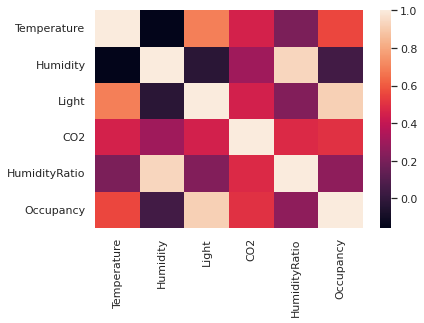

In [19]:
sns.heatmap(df3.corr())

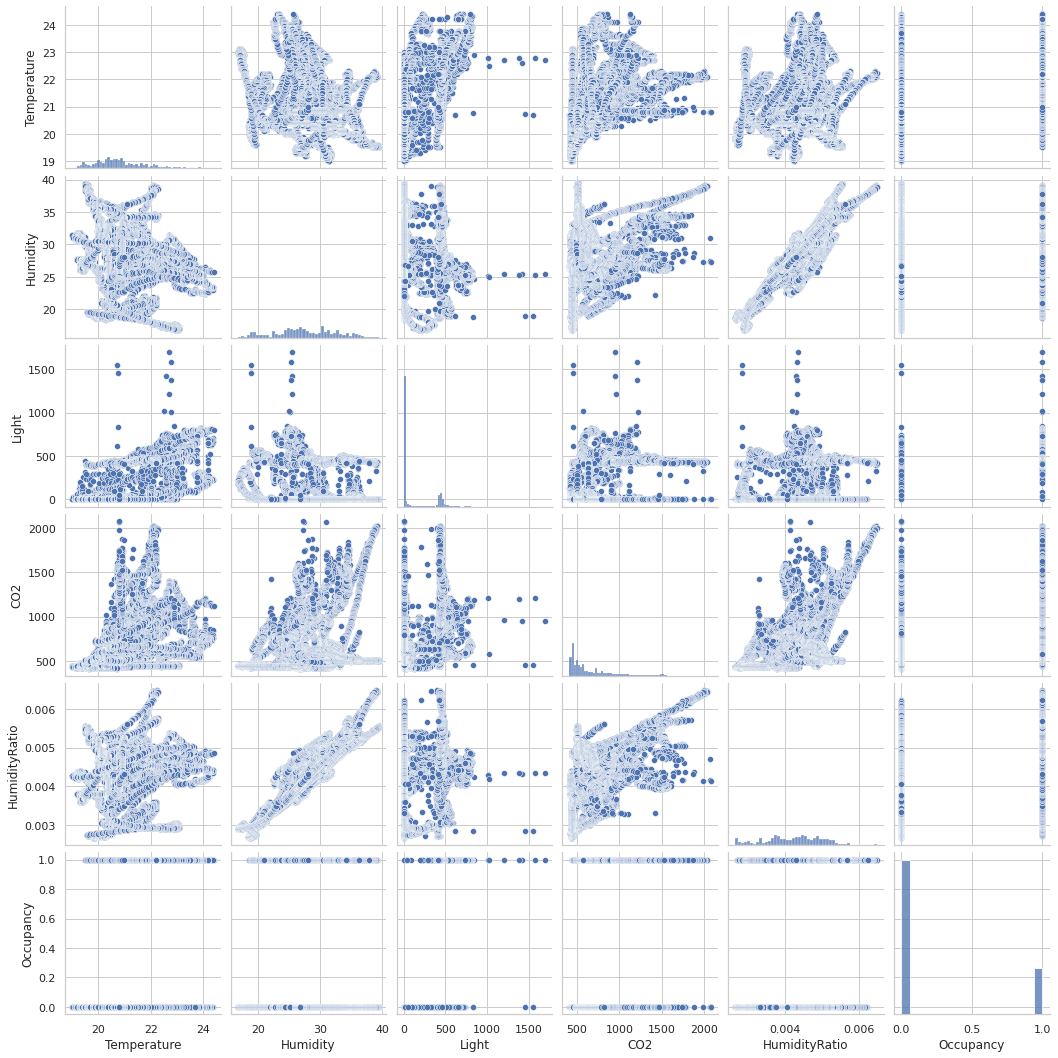

In [20]:
sns.pairplot(df3[['Temperature', 'Humidity', 'Light', 'CO2','HumidityRatio','Occupancy']])

[Text(0.5, 1.0, 'CO2')]

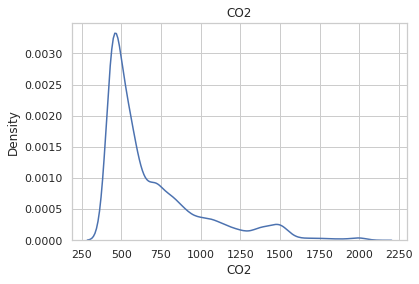

In [21]:
sns.kdeplot(df3['CO2']).set(title='CO2')

[Text(0.5, 1.0, 'Occupancy')]

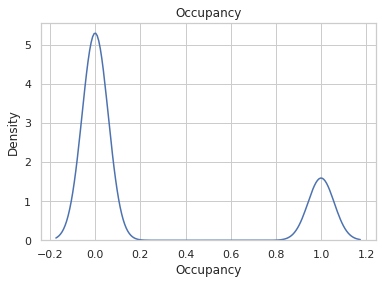

In [22]:
sns.kdeplot(df3['Occupancy']).set(title='Occupancy')

[Text(0.5, 1.0, 'Temperature')]

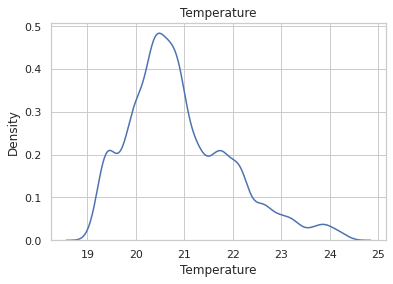

In [23]:
sns.kdeplot(df3['Temperature']).set(title='Temperature')

[Text(0.5, 1.0, 'Humidity')]

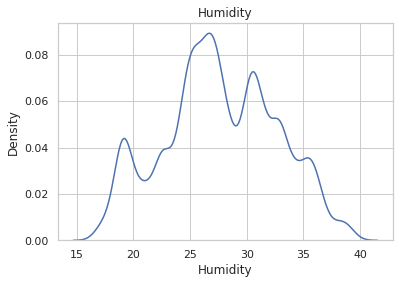

In [24]:
sns.kdeplot(df3['Humidity']).set(title='Humidity')

[Text(0.5, 1.0, 'HumidityRatio')]

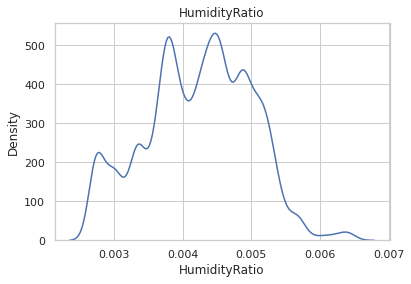

In [25]:
sns.kdeplot(df3['HumidityRatio']).set(title='HumidityRatio')

[Text(0.5, 1.0, 'Light')]

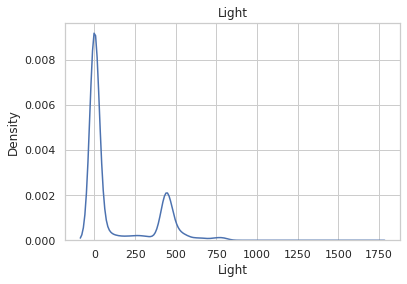

In [26]:
sns.kdeplot(df3['Light']).set(title='Light')

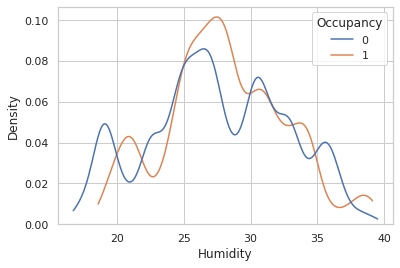

In [27]:
sns.kdeplot(data=df3, x="Humidity", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

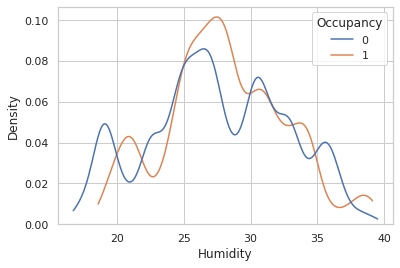

In [28]:
sns.kdeplot(data=df3, x="Humidity", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

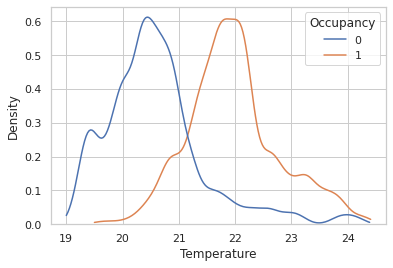

In [29]:
sns.kdeplot(data=df3, x="Temperature", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

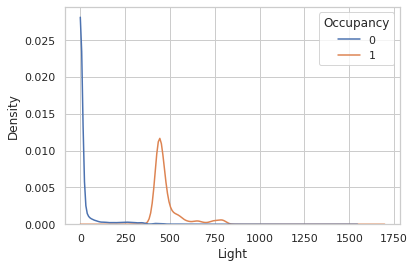

In [30]:
sns.kdeplot(data=df3, x="Light", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

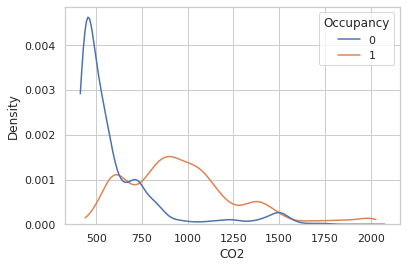

In [31]:
sns.kdeplot(data=df3, x="CO2", hue="Occupancy", cut=0, fill=False, common_norm=False, alpha=1)
plt.show()

## Creating other dataframes for analysis

Made a seperate dataframe that is identical to the previous dataframe, but without the date column

In [33]:
df5=df3[df3.columns[-6:]]

In [34]:
df5

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
20555,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [35]:
normdf=df5[df5.columns[:5]]

normdf

,Temperature,Humidity,Light,CO2,HumidityRatio
0,23.7000,26.2720,585.200000,749.200000,0.004764
1,23.7180,26.2900,578.400000,760.400000,0.004773
2,23.7300,26.2300,572.666667,769.666667,0.004765
3,23.7225,26.1250,493.750000,774.750000,0.004744
4,23.7540,26.2000,488.600000,779.000000,0.004767
...,...,...,...,...,...
20555,20.8150,27.7175,429.750000,1505.250000,0.004213
20556,20.8650,27.7450,423.500000,1514.500000,0.004230
20557,20.8900,27.7450,423.500000,1521.500000,0.004237
20558,20.8900,28.0225,418.750000,1632.000000,0.004279


In [36]:
normdf1=(normdf-normdf.min())/(normdf.max()-normdf.min())

normdf1

,Temperature,Humidity,Light,CO2,HumidityRatio
0,0.869029,0.418677,0.344793,0.202224,0.549737
1,0.872357,0.419468,0.340787,0.208956,0.551972
2,0.874576,0.416831,0.337409,0.214525,0.549997
3,0.873190,0.412217,0.290912,0.217581,0.544374
4,0.879014,0.415513,0.287877,0.220135,0.550376
...,...,...,...,...,...
20555,0.335593,0.482202,0.253204,0.656649,0.404757
20556,0.344838,0.483410,0.249521,0.662209,0.409306
20557,0.349461,0.483410,0.249521,0.666416,0.411030
20558,0.349461,0.495605,0.246723,0.732832,0.422253


In [37]:
squaredf=normdf**(1/2)

squaredf

,Temperature,Humidity,Light,CO2,HumidityRatio
0,4.868265,5.125622,24.190907,27.371518,0.069023
1,4.870113,5.127377,24.049948,27.575351,0.069084
2,4.871345,5.121523,23.930455,27.742867,0.069030
3,4.870575,5.111262,22.220486,27.834331,0.068875
4,4.873808,5.118594,22.104298,27.910571,0.069041
...,...,...,...,...,...
20555,4.562346,5.264741,20.730412,38.797551,0.064907
20556,4.567822,5.267352,20.579116,38.916577,0.065040
20557,4.570558,5.267352,20.579116,39.006410,0.065091
20558,4.570558,5.293628,20.463382,40.398020,0.065418


Copying earlier process for creating new dataframes but for the original seperate files instead of the merged file

In [139]:
dftest1=df[df3.columns[-6:]]
dftrain=df1[df3.columns[-6:]]
dftest2=df2[df3.columns[-6:]]

In [140]:
normdftest1=dftest1[dftest1.columns[:5]]
normtest1=(normdftest1-normdftest1.min())/(normdftest1.max()-normdftest1.min())

normdftest2=dftest2[dftest2.columns[:5]]
normtest2=(normdftest2-normdftest2.min())/(normdftest2.max()-normdftest2.min())

normdftrain=dftrain[dftrain.columns[:5]]
normtrain=(normdftrain-normdftrain.min())/(normdftrain.max()-normdftrain.min())

In [141]:
squaredftest1=normdftest1**(1/2)
squaredftest2=normdftest2**(1/2)
squaredftrain=normdftrain**(1/2)

# Logistic Regression

## Logistic Regression Experiments

Experiment #1

In [41]:
X_train = dftrain.loc[:, dftrain.columns != 'Occupancy']
y_train = dftrain.loc[:, dftrain.columns == 'Occupancy']
X_test = dftest1.loc[:, dftest1.columns != 'Occupancy']
y_test = dftest1.loc[:, dftest1.columns == 'Occupancy']

In [42]:
clf = clf.fit(X_train, y_train)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
clf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
logreg=LogisticRegression().fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.97      2665
weighted avg       0.98      0.98      0.98      2665



Experiment #2

In [45]:
X_train = dftrain.loc[:, dftrain.columns != 'Occupancy']
y_train = dftrain.loc[:, dftrain.columns == 'Occupancy']
X_test = dftest2.loc[:, dftest1.columns != 'Occupancy']
y_test = dftest2.loc[:, dftest1.columns == 'Occupancy'] 

In [46]:
clf = clf.fit(X_train, y_train)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
clf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
logreg=LogisticRegression().fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.97      0.95      0.96      2049

    accuracy                           0.98      9752
   macro avg       0.98      0.97      0.98      9752
weighted avg       0.98      0.98      0.98      9752



Experment #3

In [49]:
X_train = normdftrain
y_train = dftrain.loc[:, dftrain.columns == 'Occupancy']
X_test = normdftest1
y_test = dftest1.loc[:, dftest1.columns == 'Occupancy']

In [50]:
clf = clf.fit(X_train, y_train)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
clf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
logreg=LogisticRegression().fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.97      2665
weighted avg       0.98      0.98      0.98      2665



/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment #4

In [53]:
X_train = normdftrain
y_train = dftrain.loc[:, dftrain.columns == 'Occupancy']
X_test = normdftest2
y_test = dftest2.loc[:, dftest2.columns == 'Occupancy']

In [54]:
clf = clf.fit(X_train, y_train)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
clf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [56]:
logreg=LogisticRegression().fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.97      0.95      0.96      2049

    accuracy                           0.98      9752
   macro avg       0.98      0.97      0.98      9752
weighted avg       0.98      0.98      0.98      9752



Experiment #5

In [57]:
X_train = squaredftrain
y_train = dftrain.loc[:, dftrain.columns == 'Occupancy']
X_test = squaredftest1
y_test = dftest1.loc[:, dftest1.columns == 'Occupancy']

In [58]:
clf = clf.fit(X_train, y_train)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
clf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [60]:
logreg=LogisticRegression().fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



Experiment #6

In [61]:
X_train = squaredftrain
y_train = dftrain.loc[:, dftrain.columns == 'Occupancy']
X_test = squaredftest2
y_test = dftest2.loc[:, dftest2.columns == 'Occupancy']

In [62]:
clf = clf.fit(X_train, y_train)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
clf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
logreg=LogisticRegression().fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7703
           1       0.97      0.99      0.98      2049

    accuracy                           0.99      9752
   macro avg       0.98      0.99      0.99      9752
weighted avg       0.99      0.99      0.99      9752



#### Failed experiments included in notebook to document issues experienced regarding bias due to using merged dataset rather than the data split by the original author.

Failed Experiment #1

In [65]:
# split the full data 90:10 into training:validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, random_state=101)

# split training data 88.89:11.11 into training:testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8889, random_state=101)

In [66]:
clf = clf.fit(X_train, y_train)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
clf.score(X,y)

0.9890077821011674

In [69]:
logreg=LogisticRegression().fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1593
           1       0.97      0.99      0.98       463

    accuracy                           0.99      2056
   macro avg       0.98      0.99      0.99      2056
weighted avg       0.99      0.99      0.99      2056



Failed Experiment #2

In [70]:
X = normdf
y = df5.loc[:, df5.columns == 'Occupancy']

In [71]:
# split the full data 90:10 into training:validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, random_state=101)

# split training data 88.89:11.11 into training:testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8889, random_state=101)

In [72]:
clf = clf.fit(X_train, y_train)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
clf.score(X,y)

0.9890077821011674

In [75]:
logreg=LogisticRegression().fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1593
           1       0.97      0.99      0.98       463

    accuracy                           0.99      2056
   macro avg       0.98      0.99      0.99      2056
weighted avg       0.99      0.99      0.99      2056



/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Failed Experiment #3

In [76]:
X = df5.loc[:, df5.columns != 'Occupancy']
y = df5.loc[:, df5.columns == 'Occupancy']

In [77]:
# split the full data 85:15 into training:validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.85, random_state=101)

# split training data 82.35:17.65 into training:testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8235, random_state=101)

In [78]:
clf = clf.fit(X_train, y_train)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
clf.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0])

In [80]:
clf.score(X,y)

0.9889105058365759

In [81]:
logreg=LogisticRegression().fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2373
           1       0.97      1.00      0.98       712

    accuracy                           0.99      3085
   macro avg       0.98      0.99      0.99      3085
weighted avg       0.99      0.99      0.99      3085



/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Failed Experiment #4

In [82]:
X = normdf
y = df5.loc[:, df5.columns == 'Occupancy']

In [83]:
# split the full data 85:15 into training:validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.85, random_state=101)

# split training data 82.35:17.65 into training:testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8235, random_state=101)

In [84]:
clf = clf.fit(X_train, y_train)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
clf.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0])

In [86]:
clf.score(X,y)

0.9889105058365759

In [87]:
logreg=LogisticRegression().fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2373
           1       0.97      1.00      0.98       712

    accuracy                           0.99      3085
   macro avg       0.98      0.99      0.99      3085
weighted avg       0.99      0.99      0.99      3085



Failed Experiment #5

In [88]:
X = squaredf
y = df5.loc[:, df5.columns == 'Occupancy']

In [89]:
# split the full data 85:15 into training:validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.85, random_state=101)

# split training data 82.35:17.65 into training:testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8235, random_state=101)

In [90]:
clf = clf.fit(X_train, y_train)

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
clf.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0])

In [92]:
clf.score(X,y)

0.9885700389105059

In [93]:
logreg=LogisticRegression().fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2373
           1       0.96      1.00      0.98       712

    accuracy                           0.99      3085
   macro avg       0.98      0.99      0.99      3085
weighted avg       0.99      0.99      0.99      3085



# KNN

In [94]:
X_train = np.array(dftrain.loc[:, dftrain.columns != 'Occupancy'])
y_train = np.array(dftrain.loc[:, dftrain.columns == 'Occupancy'])

In [95]:
X_test = np.array(dftest1.loc[:, dftest1.columns != 'Occupancy'])
y_test = np.array(dftest1.loc[:, dftest1.columns == 'Occupancy'])

Comparing the accuracy scores of different numbers of neighbors

In [96]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_test, y_test)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9864915572232645


In [97]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9789868667917448


In [98]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9425891181988743


## KNN Experiments

Experiment #1

In [99]:
X_train = dftrain.loc[:, dftrain.columns != 'Occupancy']
y_train = dftrain.loc[:, dftrain.columns == 'Occupancy']
X_test = dftest1.loc[:, dftest1.columns != 'Occupancy']
y_test = dftest1.loc[:, dftest1.columns == 'Occupancy']

In [100]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9606003752345216


In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1693
           1       0.95      0.94      0.95       972

    accuracy                           0.96      2665
   macro avg       0.96      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665



Experiment #2

In [102]:
X_train = dftrain.loc[:, dftrain.columns != 'Occupancy']
y_train = dftrain.loc[:, dftrain.columns == 'Occupancy']
X_test = dftest2.loc[:, dftest2.columns != 'Occupancy']
y_test = dftest2.loc[:, dftest2.columns == 'Occupancy']

In [103]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9671862182116489


In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      7703
           1       0.87      0.99      0.93      2049

    accuracy                           0.97      9752
   macro avg       0.93      0.97      0.95      9752
weighted avg       0.97      0.97      0.97      9752



Experiment #3

In [105]:
X_train = normdftrain
y_train = dftrain.loc[:, dftrain.columns == 'Occupancy']
X_test = normdftest1
y_test = dftest1.loc[:, dftest1.columns == 'Occupancy']

In [106]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9606003752345216


In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1693
           1       0.95      0.94      0.95       972

    accuracy                           0.96      2665
   macro avg       0.96      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665



Experiment #4

In [108]:
X_train = normdftrain
y_train = dftrain.loc[:, dftrain.columns == 'Occupancy']
X_test = normdftest2
y_test = dftest2.loc[:, dftest2.columns == 'Occupancy']

In [109]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9671862182116489


In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      7703
           1       0.87      0.99      0.93      2049

    accuracy                           0.97      9752
   macro avg       0.93      0.97      0.95      9752
weighted avg       0.97      0.97      0.97      9752



Experiment #5

In [111]:
X_train = squaredftrain
y_train = dftrain.loc[:, dftrain.columns == 'Occupancy']
X_test = squaredftest1
y_test = dftest1.loc[:, dftest1.columns == 'Occupancy']

In [112]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9621013133208255


In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1693
           1       0.95      0.95      0.95       972

    accuracy                           0.96      2665
   macro avg       0.96      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665



Experiment #6

In [114]:
X_train = squaredftrain
y_train = dftrain.loc[:, dftrain.columns == 'Occupancy']
X_test = squaredftest2
y_test = dftest2.loc[:, dftest2.columns == 'Occupancy']

In [115]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9611361771944217


In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      7703
           1       0.87      0.96      0.91      2049

    accuracy                           0.96      9752
   macro avg       0.93      0.96      0.94      9752
weighted avg       0.96      0.96      0.96      9752



#### Failed experiments included in notebook to document issues experienced regarding bias due to using merged dataset rather than the data split by the original author.

Failed Experiment #1

In [117]:
# split the full data 90:10 into training:validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, random_state=101)

# split training data 88.89:11.11 into training:testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8889, random_state=101)

In [118]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9912451361867705


In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1593
           1       0.98      0.98      0.98       463

    accuracy                           0.99      2056
   macro avg       0.99      0.99      0.99      2056
weighted avg       0.99      0.99      0.99      2056



Failed Experiment #2

In [120]:
X = normdf
y = df5.loc[:, df5.columns == 'Occupancy']

In [121]:
# split the full data 90:10 into training:validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, random_state=101)

# split training data 88.89:11.11 into training:testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8889, random_state=101)

In [122]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9907587548638133


In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1593
           1       0.97      0.99      0.98       463

    accuracy                           0.99      2056
   macro avg       0.98      0.99      0.99      2056
weighted avg       0.99      0.99      0.99      2056



Failed Experiment #3

In [124]:
X = df5.loc[:, df5.columns != 'Occupancy']
y = df5.loc[:, df5.columns == 'Occupancy']

In [125]:
# split the full data 85:15 into training:validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.85, random_state=101)

# split training data 82.35:17.65 into training:testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8235, random_state=101)

In [126]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9925445705024312


In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2373
           1       0.97      0.99      0.98       712

    accuracy                           0.99      3085
   macro avg       0.99      0.99      0.99      3085
weighted avg       0.99      0.99      0.99      3085



Failed Experiment #4

In [128]:
X = normdf
y = df5.loc[:, df5.columns == 'Occupancy']

In [129]:
# split the full data 85:15 into training:validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.85, random_state=101)

# split training data 82.35:17.65 into training:testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8235, random_state=101)

In [130]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9925445705024312


In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2373
           1       0.97      0.99      0.98       712

    accuracy                           0.99      3085
   macro avg       0.99      0.99      0.99      3085
weighted avg       0.99      0.99      0.99      3085



Failed Experiment #5

In [132]:
X = squaredf
y = df5.loc[:, df5.columns == 'Occupancy']

In [133]:
# split the full data 85:15 into training:validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.85, random_state=101)

# split training data 82.35:17.65 into training:testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8235, random_state=101)

In [134]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

/home/joshuadow02/.local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.993192868719611


In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2373
           1       0.98      0.99      0.99       712

    accuracy                           0.99      3085
   macro avg       0.99      0.99      0.99      3085
weighted avg       0.99      0.99      0.99      3085

